# PLOT CONNECTOGRAM

This notebook is based on code provided by Project Supervisor.

The objective of this notebook is to generate a visualization of the brain connectogram.

In [119]:
### The required libraries and packages ###
import os 
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Statistics
from scipy.stats import mannwhitneyu, ttest_ind, bartlett, shapiro
from statsmodels.stats.multitest import fdrcorrection, multipletests

#nxviz
import nxviz as nv
from nxviz import annotate


## Load required data

This initial section mirrors the steps outlined in *Harmonization.ipynb*, as it utilizes the same dataset. However, in this case, we are working with data that has already been harmonized.

In [5]:
## Define paths

folder_path = "data/"
FA_path = "FA_matrices_c/"
GM_path = "GM_matrices_c/"
fMRI_path = "fMRI_matrices_c/"

In [6]:
# Nodes names

names = pd.read_csv(folder_path + "mindboggle_ROIs.txt", sep = "\t" )
name_list = names.iloc[:, 0].tolist()

In [7]:
# Clinical data

clinical_data = pd.read_csv(folder_path + "clinic.csv", index_col = 1)
cols_to_keep = ["age", "sex", "dd", "edss", "controls_ms"]
clinical_data = clinical_data[cols_to_keep]

Define a the function that we use to load matrices and create a dataframe where each column represent and interaction between two nodes and indices are participants ids

In [8]:
def load_data(matrices_path):
    # We obtain all files names and filter for csv
    all_files = os.listdir(folder_path + matrices_path)
    csv_files = [file for file in all_files if file.endswith('.csv')]
    
    # Depending on which matrices we import we have diferent "endnames"
    if matrices_path == FA_path:
        to_split ="_FA_factor_corrected.csv"
    elif matrices_path == GM_path:
        to_split = "_GM_matrix_corrected.csv"
    elif matrices_path == fMRI_path:
        to_split = "_r_matrix_corrected.csv"

    # Create a dictionary
    #### keys are subjects ids, obtained from splitting file name
    #### values are each dataframe
    #### column names are nodes names
    dfs = {file.split(to_split)[0]: pd.read_csv(os.path.join(folder_path, matrices_path,file), header = None, names = name_list) 
          for file in csv_files}
    
    # Set dataframes index as nodes names
    for key, df in dfs.items():
        df.index = name_list
    
    # Create a list to store the upper triangular elements as dictionaries
    upper_triangular_dicts = []

    # Iterate through the dictionary and extract the upper triangular elements
    for key, df in dfs.items():
        n = len(df)
        upper_triangular_data = {}

        for i in range(n):
            for j in range(i+1, n):  # j must be > i in order to iterate over upper diagonal, we skip diagonal
                row_name = df.index[i] 
                col_name = df.columns[j]
                combined_name = f"{row_name}/{col_name}" # Create columns name as combination of nodes, i.e. connection 
                value = df.iloc[i, j]
                upper_triangular_data[combined_name] = value # Add value to dictionary

    # Add the upper triangular dictionary to the list
        upper_triangular_dicts.append(upper_triangular_data)

    # Convert the list of dictionaries to a DataFrame
    result = pd.DataFrame(upper_triangular_dicts, index=dfs.keys())
    df_final =pd.concat([result, clinical_data], axis = 1) # Merge with clinical data
    
    return(df_final)

In [12]:
# Load data
FA_df = load_data(FA_path)
GM_df = load_data(GM_path)
fMRI_df = load_data(fMRI_path)

In [39]:
FA_df.head()

,ctx-lh-caudalanteriorcingulate/ctx-lh-caudalmiddlefrontal,ctx-lh-caudalanteriorcingulate/ctx-lh-cuneus,ctx-lh-caudalanteriorcingulate/ctx-lh-entorhinal,ctx-lh-caudalanteriorcingulate/ctx-lh-fusiform,ctx-lh-caudalanteriorcingulate/ctx-lh-inferiorparietal,ctx-lh-caudalanteriorcingulate/ctx-lh-inferiortemporal,ctx-lh-caudalanteriorcingulate/ctx-lh-isthmuscingulate,ctx-lh-caudalanteriorcingulate/ctx-lh-lateraloccipital,ctx-lh-caudalanteriorcingulate/ctx-lh-lateralorbitofrontal,ctx-lh-caudalanteriorcingulate/ctx-lh-lingual,...,ctx-rh-superiortemporal/ctx-rh-transversetemporal,ctx-rh-superiortemporal/ctx-rh-insula,ctx-rh-supramarginal/ctx-rh-transversetemporal,ctx-rh-supramarginal/ctx-rh-insula,ctx-rh-transversetemporal/ctx-rh-insula,age,sex,dd,edss,controls_ms
002MSVIS,0.323966,0.280882,0.102555,0.000000,0.183752,0.303809,0.000000,0.269585,0.284821,0.043648,...,0.426030,0.471652,0.304220,0.550451,0.608276,51.53,1,22.18,7.5,1
003MSVIS,0.004214,0.172493,0.038319,0.157708,0.183477,0.112828,0.024623,0.161768,0.186286,0.223668,...,0.523544,0.667273,0.381991,0.190694,0.368149,58.06,0,9.57,6.0,1
004MSVIS,0.690146,0.217202,0.508661,0.506403,0.240202,0.345948,0.472031,0.262582,0.328863,0.603125,...,0.008670,0.346880,0.261818,0.489867,0.601260,60.78,1,6.79,3.0,1
005MSVIS,0.412052,0.202844,0.333588,0.023163,0.335791,0.464558,0.117851,0.368819,0.383471,0.138349,...,0.565336,0.823688,0.268090,0.604084,0.749515,37.95,0,8.45,1.5,1
010MSVIS,0.077615,0.047773,0.119387,0.204930,0.079536,0.453488,0.363171,0.098913,0.000000,0.024340,...,0.504794,0.703537,0.194900,0.407123,0.533172,52.64,0,9.05,2.0,1


In [32]:
GM_df.head()

In [ ]:
fMRI_df.head()

## Statistical test

We have defined a function to perform statistical tests on the dataset. Although similar to the function we defined in R, it's not exactly the same. In R, we tested graph measurements, whereas here, we are testing matrix connections. Initially, we test our data for normality using the Shapiro test. If the distribution is normal, we perform a t-test, and if it's not, we use the Mann-Whitney test. Furthermore, to adjust for multiple comparisons, we apply the Bonferroni correction to the dataset.

In [71]:
def statistical_test_df(data):
    #Creation of empty dataframe to store values
    connection_stats = pd.DataFrame(columns = ["ROI", "pvalue"])
    alpha = 0.05
    features = data.iloc[:, :-6].columns.to_list() #Remove clinical data columns and convert lo list

    #Divide our dataset into HS and PwMS to check normality
    HS = data.loc[data["controls_ms"] == 0, :]
    PwMS = data.loc[data["controls_ms"] == 1, :]
    
    for feat in features:
    # Check normality with Shapiro
        stat1, p1 = shapiro(HS[feat])
        stat2, p2 = shapiro(PwMS[feat])

        if (p1 > alpha) and (p2 > alpha): 

            #Check homoscedasticity to include it in t test
            stat_b, p_b = bartlett(HS[feat], PwMS[feat])
            hom = True
            if p_b <= alpha:
                hom = False

            #If it meets conditions it is normal

            stat, p = ttest_ind(HS[feat], PwMS[feat], equal_var = hom)

        else:
            # When it is not normal
            stat,p = mannwhitneyu(HS[feat], PwMS[feat])

        if p <= alpha:
            new_row =pd.DataFrame({"ROI": [feat], "pvalue": [p]})
            connection_stats = pd.concat([connection_stats, new_row], ignore_index = True)
    
    print('{} statistically sginificant connections' .format(len(connection_stats)))
   
    ## BONFERRONI CORRECTION

    bonf = multipletests(connection_stats["pvalue"], method = "bonferroni")
    connection_stats["p_bonf"] = bonf[1]
    # New dataframe only with ROIs that pass the test
    df_bonf = connection_stats[connection_stats["p_bonf"] < alpha]
    print('After Bonferroni correction, we have {} connections' .format(len(df_bonf)))
    # keep a list of columns  (ROIs) that pass the test
    stat_cols = df_bonf["ROI"].tolist()
    
    
    return(data[stat_cols],df_bonf)

In [120]:
# To avoid warning in statistical tests, mostly due to reduced number of values
# and/or a divide by zero

import warnings
warnings.filterwarnings('ignore') # To avoid warning in statistical tests, mostly due to reduced number of values
# and or a divide by zero

print("IN FA")
FA_stat, FA_bonf = statistical_test_df(FA_df)
print("\n")
print("IN GM")
GM_stat, GM_bonf = statistical_test_df(GM_df)
print("\n")
print("IN fMRI")
fMRI_stat, fMRI_bonf = statistical_test_df(fMRI_df)

IN FA
Statistically diferences in 1246 of connections
Statistically diferences in 186 of connections with Bonferroni correction (p-value multiplied by number of correlations) 


IN GM
Statistically diferences in 129 of connections
Statistically diferences in 0 of connections with Bonferroni correction (p-value multiplied by number of correlations) 


IN fMRI
Statistically diferences in 162 of connections
Statistically diferences in 0 of connections with Bonferroni correction (p-value multiplied by number of correlations) 


It is quite interesting to note we do not have statistical differences in connections from fMRI and GM matrices.

In [83]:
df_stat = pd.concat([FA_stat, GM_stat, fMRI_stat], axis = 1) #though it is not necessary we concatenate results
df_bonf = FA_bonf # as we do not have more values

## Graph construction

As there are too many connections in our matrices to represent them in a graph, we need to limit their number. This is the reason we are going to use p values from Bonferroni correction as weights in our graph, this will highlight most significant connections.


The subsequent steps are designed to construct a dataframe that will act as an edge list to build our graph.

In [90]:
#Obtain list of connections from our dataframes
interactions_list = FA_df.iloc[:, :-6].columns.to_list()

#Create empty dataframe
df_interactions = pd.DataFrame(interactions_list, columns=["ROI"])

#Create a column for each node, splitting names
df_interactions[["ROI_1", "ROI_2"]] = df_interactions['ROI'].str.split('/', expand = True)
df_interactions

,ROI,ROI_1,ROI_2
0,ctx-lh-caudalanteriorcingulate/ctx-lh-caudalmi...,ctx-lh-caudalanteriorcingulate,ctx-lh-caudalmiddlefrontal
1,ctx-lh-caudalanteriorcingulate/ctx-lh-cuneus,ctx-lh-caudalanteriorcingulate,ctx-lh-cuneus
2,ctx-lh-caudalanteriorcingulate/ctx-lh-entorhinal,ctx-lh-caudalanteriorcingulate,ctx-lh-entorhinal
3,ctx-lh-caudalanteriorcingulate/ctx-lh-fusiform,ctx-lh-caudalanteriorcingulate,ctx-lh-fusiform
4,ctx-lh-caudalanteriorcingulate/ctx-lh-inferior...,ctx-lh-caudalanteriorcingulate,ctx-lh-inferiorparietal
...,...,...,...
2844,ctx-rh-superiortemporal/ctx-rh-supramarginal,ctx-rh-superiortemporal,ctx-rh-supramarginal
2845,ctx-rh-superiortemporal/ctx-rh-transversetemporal,ctx-rh-superiortemporal,ctx-rh-transversetemporal
2846,ctx-rh-superiortemporal/ctx-rh-insula,ctx-rh-superiortemporal,ctx-rh-insula
2847,ctx-rh-supramarginal/ctx-rh-transversetemporal,ctx-rh-supramarginal,ctx-rh-transversetemporal


In [91]:
# Merge with data with Bonferroni p values, replacing NAs with 0
df_interactions = df_interactions.merge(df_bonf, on = "ROI", how = "left")
df_interactions.fillna(0, inplace = True)
df_interactions

,ROI,ROI_1,ROI_2,pvalue,p_bonf
0,ctx-lh-caudalanteriorcingulate/ctx-lh-caudalmi...,ctx-lh-caudalanteriorcingulate,ctx-lh-caudalmiddlefrontal,0.0,0.0
1,ctx-lh-caudalanteriorcingulate/ctx-lh-cuneus,ctx-lh-caudalanteriorcingulate,ctx-lh-cuneus,0.0,0.0
2,ctx-lh-caudalanteriorcingulate/ctx-lh-entorhinal,ctx-lh-caudalanteriorcingulate,ctx-lh-entorhinal,0.0,0.0
3,ctx-lh-caudalanteriorcingulate/ctx-lh-fusiform,ctx-lh-caudalanteriorcingulate,ctx-lh-fusiform,0.0,0.0
4,ctx-lh-caudalanteriorcingulate/ctx-lh-inferior...,ctx-lh-caudalanteriorcingulate,ctx-lh-inferiorparietal,0.0,0.0
...,...,...,...,...,...
2844,ctx-rh-superiortemporal/ctx-rh-supramarginal,ctx-rh-superiortemporal,ctx-rh-supramarginal,0.0,0.0
2845,ctx-rh-superiortemporal/ctx-rh-transversetemporal,ctx-rh-superiortemporal,ctx-rh-transversetemporal,0.0,0.0
2846,ctx-rh-superiortemporal/ctx-rh-insula,ctx-rh-superiortemporal,ctx-rh-insula,0.0,0.0
2847,ctx-rh-supramarginal/ctx-rh-transversetemporal,ctx-rh-supramarginal,ctx-rh-transversetemporal,0.0,0.0


In [92]:
#Remove unnecessary columns
df_graph = df_interactions.drop(["ROI", "pvalue"], axis = 1)
#Rename columns to a more "graphy" name
df_graph.rename(columns = {"ROI_1": 'source', "ROI_2": 'target', 'p_bonf': 'weight'}, inplace = True)
df_graph

,source,target,weight
0,ctx-lh-caudalanteriorcingulate,ctx-lh-caudalmiddlefrontal,0.0
1,ctx-lh-caudalanteriorcingulate,ctx-lh-cuneus,0.0
2,ctx-lh-caudalanteriorcingulate,ctx-lh-entorhinal,0.0
3,ctx-lh-caudalanteriorcingulate,ctx-lh-fusiform,0.0
4,ctx-lh-caudalanteriorcingulate,ctx-lh-inferiorparietal,0.0
...,...,...,...
2844,ctx-rh-superiortemporal,ctx-rh-supramarginal,0.0
2845,ctx-rh-superiortemporal,ctx-rh-transversetemporal,0.0
2846,ctx-rh-superiortemporal,ctx-rh-insula,0.0
2847,ctx-rh-supramarginal,ctx-rh-transversetemporal,0.0


Now we can create our networkX graph from dataframe

In [93]:
G = nx.from_pandas_edgelist(df_graph, "source", "target", "weight")

#Remove edges with weight = 0

G.remove_edges_from([(n1, n2) for n1, n2, data in G.edges(data=True) if data['weight'] == 0])


We need to reescale weight values in order to improve visualization.


In [177]:
# function to rescale list of values to range [newmin,newmax]
def rescale(l,newmin,newmax):
    arr = list(l)
    return [round((x-max(arr))/(min(arr)-max(arr))*(newmax-newmin)+newmin,2) for x in arr]


nodelist = [n for n in G.nodes]
ws = rescale([float(G[u][v]['weight']) for u,v in G.edges],1,3)
edgelist = [(str(u),str(v),{"weight":ws.pop(0)}) for u,v in G.edges]


# create new graph using nodelist and edgelist
g = nx.Graph(name='Connectogram')
g.add_nodes_from(nodelist)
g.add_edges_from(edgelist)

# Iterate over Graph to create a new class that enhances plotting by color
for v in G:
    if G.degree(v) > 11: # We cannot assing more than 12 colors
        g.nodes[v]["class"] = 11
    else:
        g.nodes[v]["class"] = G.degree(v)
        


In [178]:
#Change default color in visualization
for i,j in g.edges():
    g[i][j]["col"] = "magenta"



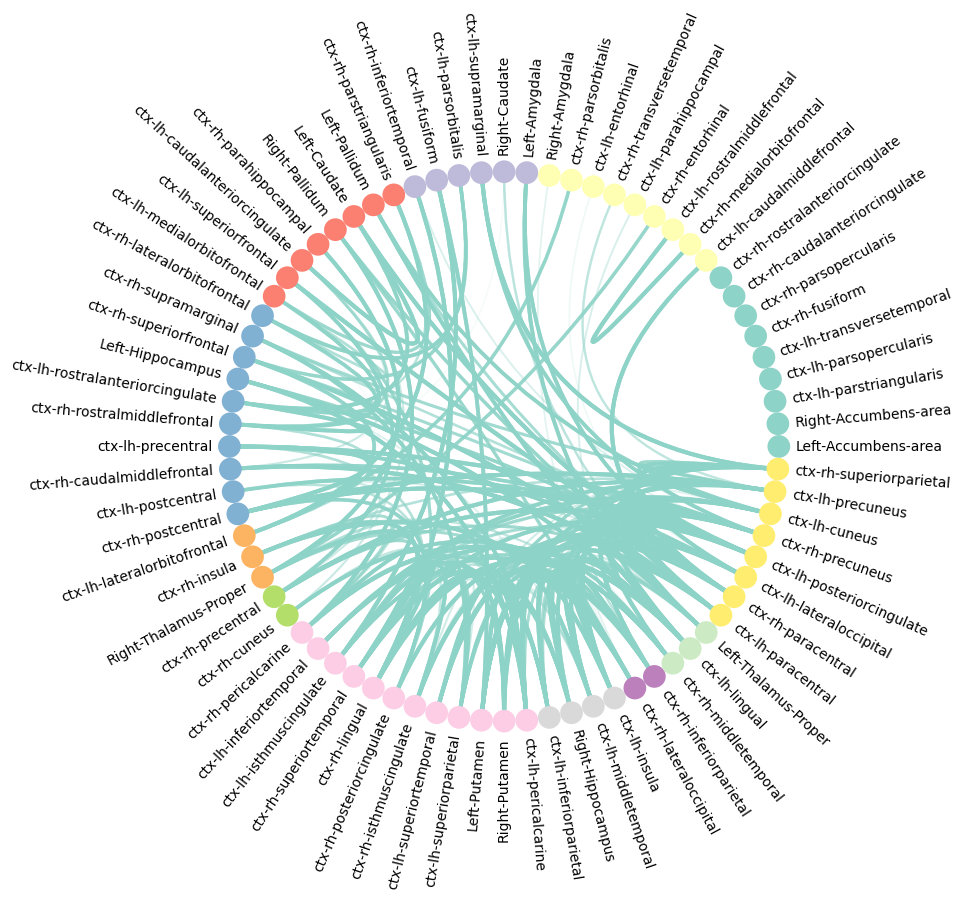

In [183]:

plt.figure(figsize=(10,10))

nv.circos(g, group_by="class", 
          node_color_by="class", 
          edge_alpha_by = "weight", 
          edge_lw_by = "weight",
         edge_color_by = "col")
annotate.circos_labels(g, group_by="class", layout="rotate")
# The rotated labels take up more space, so we will have to increase the
# padding a bit. 5% on all sides works well here.
plt.tight_layout(rect=(0.15, 0.15, 0.85, 0.85))
plt.tight_layout()
plt.savefig("images/Connectogram.png") 

plt.show()